> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate the Movie dataset from TMDb

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> **Idea on Dataset**: The dataset consist of movie reviews for 10,000 movie with 21 features like 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres' and 10866 initial entries

**Questions that can be asked**
1. Which were the most popular movies?  
    a. What are the characteristics that make a movie popular?  
    b. Correlation with budget (is it that a movie with greater budget is more popular or not)?  
    c. Correlation with revenue (if a movie generated higher revenue then how popular is it?)  
    d. Correlation with genres (which genres of movies are more popular? Is there any specific genres?)  
    e. Correlation with runtime (does a movie with more runtime generate more revenue and popularity?)  
2. Which were the movies with the greatest and least budget? How popular were they?
3. Which movie earned the most revenue? Was is equally popular?
3. Which movie had the longest and shortest runtimes? Were they popular? What was the average runtime of all the movies?
4. Which genres are more popular or made more profit? (Optional: are certain genres have some specific runtime?)
5. Which year was most profitable in terms of movie revenue generated?
6. Who are the most popular casts?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_raw = pd.read_csv('Dataset/tmdb-movies.csv')
df_raw.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df_raw.shape

(10866, 21)

In [4]:
df_raw.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
df_raw.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#looking at the datatype of the different features
df_raw.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Some observations from describing the dataset
**Columns which can be neglected or dropped**:
- The columns- 'id', 'imdb_id' can probably be dropped because these are specific to the values in the datset to mark their uniqueness. I don't feel these will be relevant enough for our analysis  
- As per the documentation the dataset has 2 specific columns: 'budget_adj' and 'revenue_adj' which show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for the inflation and probably the economic some changes in economy during the black period of 2007-08.

**Observations on data** 
1. It seems like the mean runtime of the movies were around 102 minutes
2. The mean budget spent throughout the datset is around 14.6 Million
3. The average revenue generated was around 38.8 Million
4. Probably 2001 had the most number of movies released

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Removing unused columns and replacing missing data)

In [8]:
df_raw.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Thoughts on the missing values:
Specifically, the columns which have null values are as follows:
1. imdb_id  
    Sol: Will be ignored because the feature is very specific
2. cast  
    Sol: Probably have to remove the rows where there are no casts, after looking at some of the key features like, revenue of the movie, the budget spent and most importantly its popularity
3. Homepage has a lot of missing values  
    Sol: It just contains the details of the webpages associated with the movies. This column can be removed as a whole
4. director  
    Sol: same as for number 2
5. tagline and keywords   
    Sol: If we were using any NLP tools or any predictive models to predict the popularity of the particular movie based on the specific words used in the taglines, then I guess, it would have been important. We could have created a scoring metric of the most popular of fancy terms used in the most popular movies. But since it is not the case here, I think we can ignore this column also.
6. overview   
    Sol: We are not particularly concerned about the sentiment of the movie- what it is about, what is the theme and such. I guess for our purpose of analysis knowing only the genre is good enough.
7. production_companies  
    Sol: If it is at all necessary to be used, then it can be seen that there are a lot of missing values, 1030 to be specific. These values cannot be replaced with mean values. I guess, if necessary the mode can be taken to replace those values. Considering the fact that we replace those with the most common production_companies. In this scenario, I don't think production companies would play a major role, hence they can be dropped.
8. genres  
    Sol: It has 23 missing values. Those can be removed. 

In [9]:
# finally the columns to be removed are decided as follows:
removal_cols = ['id', 'imdb_id', 'homepage', 'overview', 'tagline', 'keywords', 'budget_adj', 'revenue_adj']
df = df_raw.drop(columns=removal_cols, axis=1)
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year'],
      dtype='object')

## Some thoughts on popularity and vote_average

If we see the name of the movie which received the had a most high average votes (9.2), we will see that it is  'The Story of Film: An Odyssey'  
On the other hand I tried to find out which was the most 'popular' movie and it is 'Jurrasic World'.  
Turns out both are different.

In [10]:
# looking at the dataset trying to figure out whether the max average voted movie was actually good 
# movie which received the maximum value of average votes
df[df['vote_average'] == df.vote_average.max()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
3894,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,900,Documentary,NaN,9/3/11,14,9.2,2011


In [11]:
# movie which has the maximum popularity score
df[df['popularity'] == df.popularity.max()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [12]:
# movie which has the maximum number of vote counts
df[df['vote_count'] == df.vote_count.max()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
1919,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,7/14/10,9767,7.9,2010


**It seems like Jurassic world is more popular because probably it made more revenue than that of inception**

In [13]:
# now just looking at the movie which generated the highest revenue
df[df['revenue'] == df.revenue.max()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009


The log revenue values are as follows:  [8, 27, 15]


Text(0.5, 1.0, 'Plotting average vote counts and popularity and seeing the value against the maximum generated revenue')

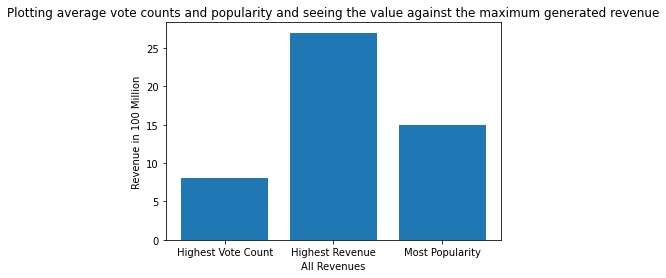

In [14]:
# Looking at the different revenues
# 1. The movie with the highest vote_average
# 2. The movie with the highest vote_count
# 3. The movie with the highest generated revenue
# 4. The movie with the highest popularity
# rev_highest_va = df[df['vote_average'] == df.vote_average.max()].revenue ## this value would be 0 hence will be removed from plotting graph list
rev_highest_vc = df[df['vote_count'] == df.vote_count.max()].revenue
rev_highest = df[df['revenue'] == df.revenue.max()].revenue
rev_highest_pop = df[df['popularity'] == df.popularity.max()].revenue 
# taking a log value to restrict the values within a certain range before plotting them
bar_ls = [int(rev_highest_vc / 10**8), int(rev_highest / 10**8), int(rev_highest_pop / 10**8)]
print('The log revenue values are as follows: ', bar_ls)
X = np.arange(3)
plt.bar(X, bar_ls);
plt.xlabel('All Revenues')
plt.ylabel('Revenue in 100 Million')
plt.xticks(X, ('Highest Vote Count', 'Highest Revenue', 'Most Popularity'));
plt.title('Plotting average vote counts and popularity and seeing the value against the maximum generated revenue')

The above cell output shows that none of the features vote count, or popularity is able to show similar results close to the actual highest revenue generated. To be more specific, none of the features have a clear relation against popularity.  
1. We cannot say, that a movie with high vote counts, has generated the maximum revenue
2. We cannot say, that a movie with high popularity score has generated the maximum revenue
3. We cannot say, that a movie with high average vote count has generated the maximum revenue.  

Only thing which we can say here is that if a movie makes very high revenue then it is not likely that it would be super popular and receive very high votes

**In the cell below I am trying to find a proper relation between the average votes and the popularity.**

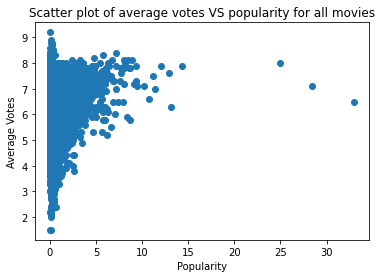

Total number of eneven values:  45


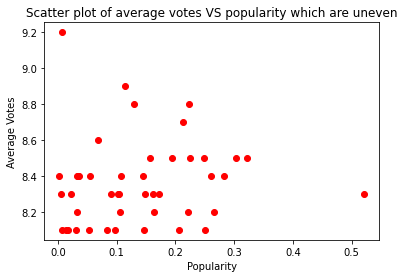

In [15]:
popularities = np.array(df.popularity)
vote_avg = np.array(df.vote_average)
plt.scatter(popularities, vote_avg);
plt.xlabel('Popularity')
plt.ylabel('Average Votes')
plt.title('Scatter plot of average votes VS popularity for all movies')
plt.show()

uneven_count = 0
uneven_pop = list()
uneven_av = list()
for i in range(len(df)):
#     print(df['vote_average'][i])
    if (df['popularity'][i] < 1.0 and df['vote_average'][i] > 8.0):
        uneven_count += 1
        uneven_av.append(df['vote_average'][i])
        uneven_pop.append(df['popularity'][i])
        #print(df['original_title'][i], 'had a popularity: ', df['popularity'][i], ' but an avg vote of: ', df['vote_average'][i])
    
print('Total number of eneven values: ', uneven_count)

plt.scatter(uneven_pop, uneven_av, c='red')
plt.xlabel('Popularity')
plt.ylabel('Average Votes')
plt.title('Scatter plot of average votes VS popularity which are uneven')
plt.show()


As is evedent from the plot and values seen, I just checked whether there are any movies where the popularity score is low (in the range 0 to 1) but has an average voting greater than 8 (which is quite high).  
Turns out there are 45 such values. 
**This is very unrealistic, considering a movie which has a very high average vote is so less popular**  
> On a final note after looking at all these three values, popularity, vote_average and vote_count, I think I will be dropping the both the voting features and rely only on the 'popularity' column for deciding the popularity metrics

**Final points to decide the popularity metric**
- So, Avatar is the movie generating the highest revenue. 
- It has a somewhat acceptable vote count
- It turns out that the movie which received the highest number of votes on an average is not actually the most popular movie.
- It is also clear that if a movie generates very high revenue then it does not always mean that it was very popular or received very high number of votes

In [16]:
# finally I will be dropping the vote_average and vote_count columns from the dataset before starting EDA
df.drop(columns=['vote_average', 'vote_count'], axis=1, inplace=True)

### Removing Duplicate rows if any

In [17]:
rows, col = df.shape
#We need to reduce the count of row by one as contain header row also.
print('There are {} total entries of movies and {} no.of columns in it.'.format(rows-1, col))

There are 10865 total entries of movies and 11 no.of columns in it.


In [18]:
# removing the duplicates
df.drop_duplicates(keep ='first', inplace=True)
rows, col = df.shape

print('There are now {} total entries of movies and {} no.of columns in it.'.format(rows-1, col))

There are now 10864 total entries of movies and 11 no.of columns in it.


There was one duplicate element which was dropped successfully from the dataset

### Removing zeros and null values from budget and the revenue columns

In [19]:
# creating a seperate list of revenue and budget column
temp_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
df[temp_list] = df[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
df.dropna(subset = temp_list, inplace = True)

rows, col = df.shape
print('After removing the null entries, the total number of movies we have: {}'.format(rows-1))

After removing the null entries, the total number of movies we have: 3853


### Changing the release date column into standard date format

In [20]:
from datetime import datetime
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date']

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10822   2066-06-21
10828   2066-07-13
10829   2066-12-17
10835   2066-12-20
10848   2066-08-24
Name: release_date, Length: 3854, dtype: datetime64[ns]

### Replacing zero with Nan values in the runtime column.

In [21]:
df['runtime'] = df['runtime'].replace(0, np.NAN)

### Checking the final formats of all the columns

In [22]:
df.dtypes

popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
release_year                     int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Calculating the total profits of each of the movies

In [23]:
df.insert(3, 'profit_generated', df.revenue-df.budget)

In [26]:
df.head(3)

,popularity,budget,revenue,profit_generated,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
1,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015
2,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015


In [37]:
# checking if any profit_generated is in negative. (Then that would be considered as a loss)
losses = df[df['profit_generated'] < 0]
print('There are {} movies which incurred loss'.format(len(losses)))

There are 1072 movies which incurred loss


### Research Question 1 (Which were the most popular movies?)

In [38]:
df.describe()

,popularity,budget,revenue,profit_generated,runtime,release_year
count,3854.000000,3.854000e+03,3.854000e+03,3.854000e+03,3854.000000,3854.000000
mean,1.191554,3.720370e+07,1.076866e+08,7.048292e+07,109.220291,2001.261028
std,1.475162,4.220822e+07,1.765393e+08,1.506195e+08,19.922820,11.282575
min,0.001117,1.000000e+00,2.000000e+00,-4.139124e+08,15.000000,1960.000000
25%,0.462368,1.000000e+07,1.360003e+07,-1.321535e+06,95.000000,1995.000000
50%,0.797511,2.400000e+07,4.480000e+07,2.002019e+07,106.000000,2004.000000
75%,1.368324,5.000000e+07,1.242125e+08,8.170331e+07,119.000000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,2.544506e+09,338.000000,2015.000000


In [64]:
# from the above cell we can see that the movie which was most popular had a popularity score of 32.98,
# considering this scenario, taking a list of movies which have a popularity score greater than 10, seems like
# a fair way to decide which movies were the most popular ones. 

# actually there are 11 such movies the names of which are printed below
top_pop = df[df['popularity'] > 10.0]
# for i in range(len(top_pop)):
#     print('Movie: ', top_pop['original_title'][i], ' popularity score: ', top_pop['popularity'][i])
top_pop

,level_0,index,popularity,budget,revenue,profit_generated,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,0,0,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
1,1,1,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015
2,2,2,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015
3,3,3,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015
160,160,629,24.949134,165000000.0,6.217525e+08,4.567525e+08,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,2014-11-05,2014
161,161,630,14.311205,170000000.0,7.733124e+08,6.033124e+08,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,2014-07-30,2014
162,162,631,12.971027,170000000.0,7.147666e+08,5.447666e+08,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,136,Action|Adventure|Science Fiction,Marvel Studios,2014-03-20,2014
163,163,632,11.422751,20000000.0,7.873990e+07,5.873990e+07,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,Chad Stahelski|David Leitch,101,Action|Thriller,Thunder Road Pictures|Warner Bros.|87Eleven|De...,2014-10-22,2014
164,164,633,10.739009,125000000.0,7.521002e+08,6.271002e+08,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,123,Science Fiction|Adventure|Thriller,Lionsgate|Color Force,2014-11-18,2014
165,165,634,10.174599,250000000.0,9.551198e+08,7.051198e+08,The Hobbit: The Battle of the Five Armies,Martin Freeman|Ian McKellen|Richard Armitage|K...,Peter Jackson,144,Adventure|Fantasy,WingNut Films|New Line Cinema|3Foot7|Metro-Gol...,2014-12-10,2014


#### Correlation with Budget

Text(0.5, 1.0, 'Scatter plot for budgets vs popularity ratings')

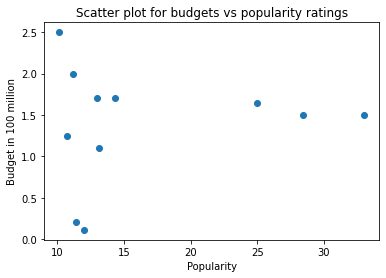

In [79]:
pops = np.array(top_pop['popularity'])
budgets = np.array(top_pop['budget'] / 10**8)
plt.scatter(pops, budgets);
plt.xlabel('Popularity')
plt.ylabel('Budget in 100 million')
plt.title('Scatter plot for budgets vs popularity ratings')

The above plot says that for most of the movies which have a high popularity score the budgets were also quite high. But it is not always true. There are movies where the budget was around 250 million and the popularity score was around 12. Also for the highest popularity score of 32.98, the budget wasn't that hight. It was somewhat around 150-200 million

#### Correlation with revenue

Text(0.5, 1.0, 'Scatter plot for revenue vs popularity ratings')

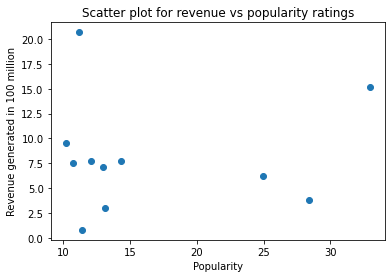

In [77]:
revenue = np.array(top_pop['revenue'] / 10**8)
plt.scatter(pops, revenue);
plt.xlabel('Popularity')
plt.ylabel('Revenue generated in 100 million')
plt.title('Scatter plot for revenue vs popularity ratings')

The above plot says that for most of the movies which have a high popularity score the revenues were also quite high. For example the one with the highest popularity has generated quite a good revenue of around 150 million.

#### Correlation with genres

Text(0.5, 1.0, 'Scatter plot for genres vs popularity ratings')

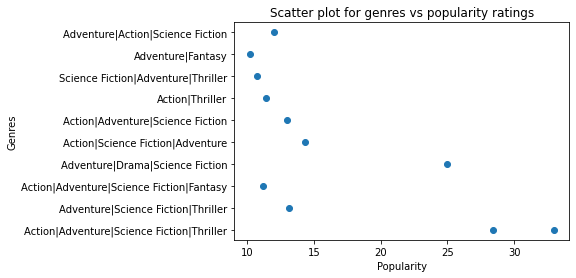

In [82]:
genres = np.array(top_pop['genres'])
plt.scatter(pops, genres);
plt.xlabel('Popularity')
plt.ylabel('Genres')
plt.title('Scatter plot for genres vs popularity ratings')

From the above plot it can be seen that the movie with the highest popularities are in the genre of 'Action|Adventure|Science Fiction|Thriller'

#### Correlation with runtimes

Text(0.5, 1.0, 'Scatter plot for runtimes vs popularity ratings')

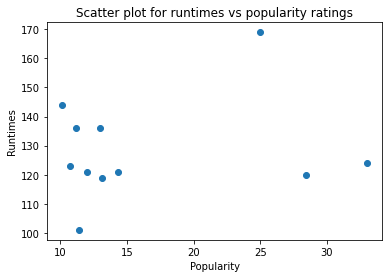

In [83]:
runtimes = np.array(top_pop['runtime'])
plt.scatter(pops, runtimes);
plt.xlabel('Popularity')
plt.ylabel('Runtimes')
plt.title('Scatter plot for runtimes vs popularity ratings')

From the above plot it can be seen that the movies with a runtime of 120-130 minutes tend to be more popular. Some around 170 are also quite popular.

### Research Question 2  (Which were the movies with the most and least budget?)

In [119]:
def calculate(column):
    #for highest value
    high = df[column].idxmax()
    d = {'High': df.loc[high]}
    high_details = pd.DataFrame(data=d)
    
    #for lowest value
    low = df[column].idxmin()
    d = {'Low': df.loc[low]}
    low_details = pd.DataFrame(data=d)
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info


In [114]:
calculate('budget')

,High,Low
level_0,682,810
index,2244,2618
popularity,0.25054,0.090186
budget,4.25e+08,1
revenue,1.10876e+07,100
profit_generated,-4.13912e+08,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95


Movie with the lowest budget: 'Lost & Found'  
Movie with the highest budget: 'The Warrior's Way'

### Research Question 3  (Which were the movies with the highest and lowest profits generated)

In [117]:
calculate('profit_generated')

,High,Low
level_0,344,682
index,1386,2244
popularity,9.43277,0.25054
budget,2.37e+08,4.25e+08
revenue,2.78151e+09,1.10876e+07
profit_generated,2.54451e+09,-4.13912e+08
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100


Movie with the lowest profit generated: 'The Warrior's Way'  
Movie with the highest profit generated: 'Avatar'

### Research Question 4  (Which were the movies with the most and least earned revenue?)

In [121]:
calculate('revenue')

,High,Low
level_0,344,1732
index,1386,5067
popularity,9.43277,0.462609
budget,2.37e+08,6e+06
revenue,2.78151e+09,2
profit_generated,2.54451e+09,-6e+06
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162,94


Movie with the lowest profit generated: 'Shattered Glass'  
Movie with the highest earned revenue: 'Avatar'

### Research Question 5  (Popularity of the movies with the highest earned profit and revenue?)

As can be seen from the above tables, popularity index of Avatar in terms of the movie having the highest revenue and being the most profitable one, is quite good. Since the average popularity score is around 1.2, a popularity score of 9.4 would be considered quite good.

### Research Question 6  (Which movie had the longest and shortest runtimes?)

In [125]:
calculate('runtime')

,High,Low
level_0,653,1758
index,2107,5162
popularity,0.534192,0.208637
budget,1.8e+07,10
revenue,871279,5
profit_generated,-1.71287e+07,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15


Movie with the highest runtime: 'Carlos'  
Movie with the lowest runtime: 'Kid's Story'

In terms of popularity these movies are below average and not much popular. The average popularity score being 1.2, these have scores of 0.53 and 0.21 respectively which can be considered below average.

### Average runtime of all the movies:

The average runtime of the movies: 109.220291 this can be seen just when we described the dataframe in the initial parts.

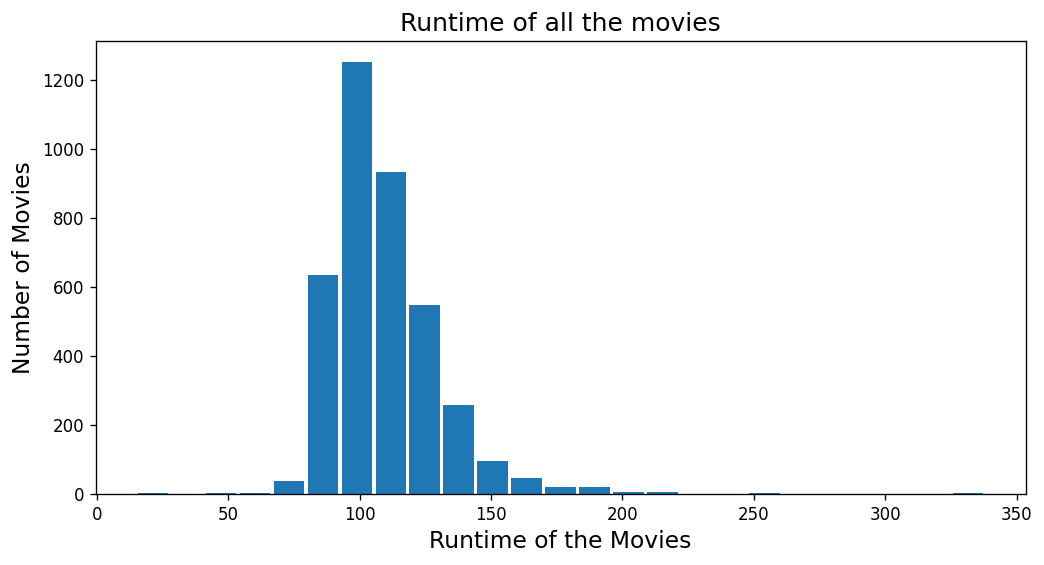

In [139]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(10,5), dpi = 120)

# x label
plt.xlabel('Runtime of the Movies', fontsize = 14)
# y label
plt.ylabel('Number of Movies', fontsize=14)
# graph title
plt.title('Runtime of all the movies', fontsize=15)

plt.hist(df['runtime'], rwidth = 0.9, bins =25)
plt.show()

### Filtering data for the most profitable movies throughout the dataset

>>Setting the profitable limit to 50 million (greater than equal to)

In [141]:
#seting the total profit to 50 million or more
profit_data = df[df['profit_generated'] >= 50000000]

# reindexing new data
profit_data.index = range(len(profit_data))

# Setting starting index to 1 instead of 0
profit_data.index = profit_data.index + 1

In [143]:
profit_data.head()

,level_0,index,popularity,budget,revenue,profit_generated,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
1,0,0,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
2,1,1,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015
3,2,2,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015
4,3,3,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015
5,4,4,9.335014,190000000.0,1.506249e+09,1.316249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015


In [144]:
profit_data.shape

(1338, 14)

### Research Question 6  (Which genres are more popular or made more profit?)

In [164]:
#function which will take any column as argument and keep its track 
def find_data(col):
    #will take a column, and separate the string by '|'
    data = profit_data[col].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [165]:
#variable to store the retured value
count = find_data('genres')
#printing top 5 values
count.head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

>> Doing a graphical analysis of the genres

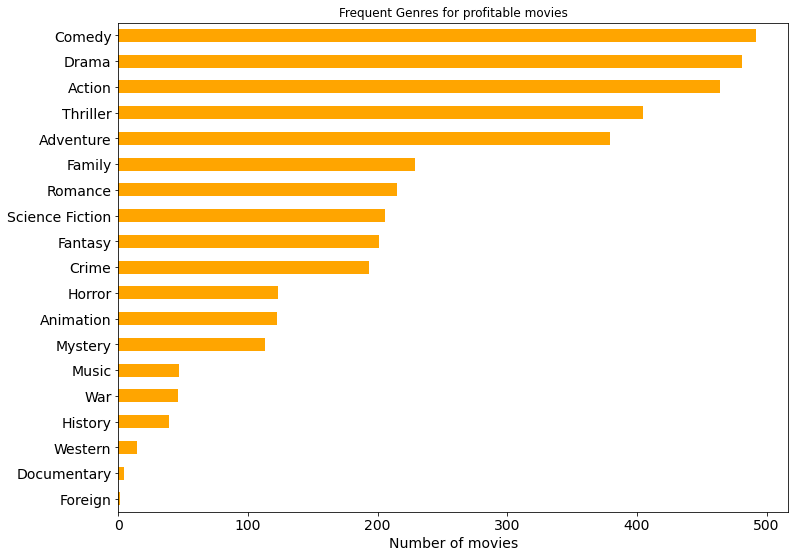

In [166]:
#lets plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = True, inplace = True)

# plotting the graph
lt = count.plot.barh(color = 'orange', fontsize = 14)

# graph plot
lt.set(title = 'Frequent Genres for profitable movies')

# x label
lt.set_xlabel('Number of movies', color = 'black', fontsize = '14')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

plt.show()

### Research Question 7  (Which year was most profitable in terms of movie revenue generated?)

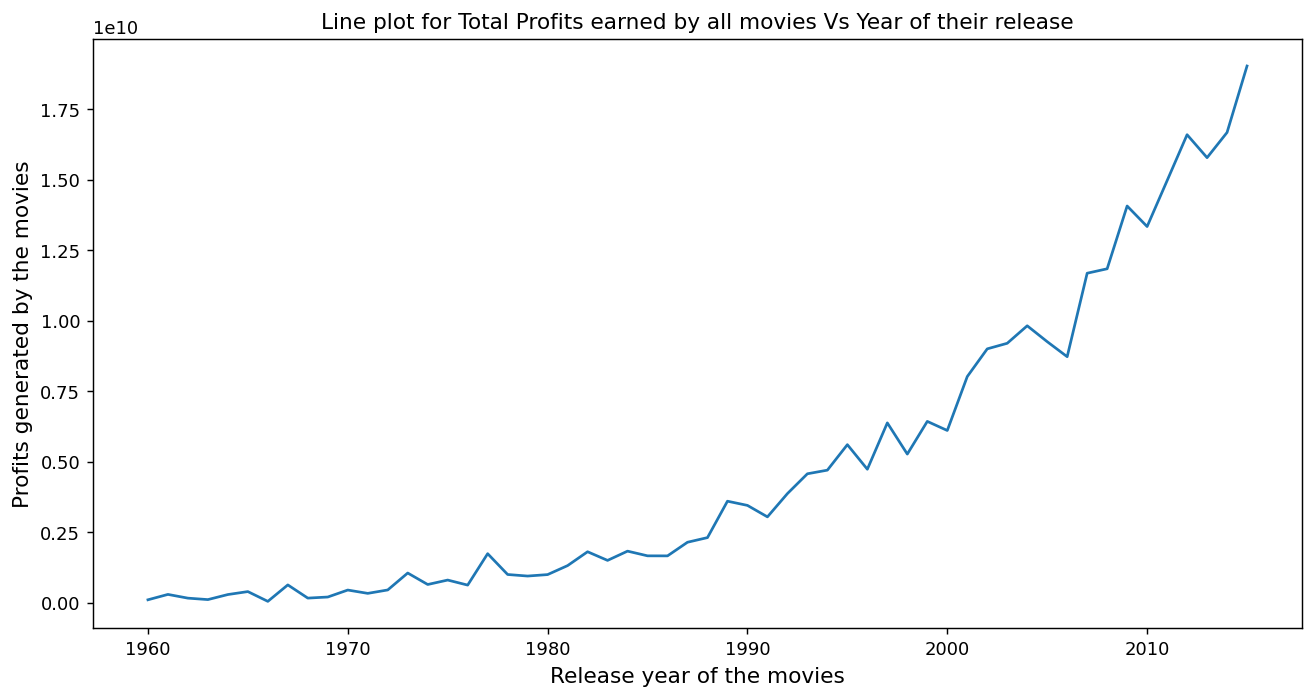

In [167]:
# plotting a line plot to feature the profits throughout the years
# Since we want the profit of the movies for every year we have to sum up all the movies of a particular year

profits_year = df.groupby('release_year')['profit_generated'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

# x labels
plt.xlabel('Release year of the movies', fontsize = 12)
# y labels
plt.ylabel('Profits generated by the movies', fontsize = 12)
# title of the line plot
plt.title('Line plot for Total Profits earned by all movies Vs Year of their release')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

In [168]:
# finally to show which year had the maximum profit:
print(profits_year.idxmax(), ' had the maximum profit.')

2015  had the maximum profit.


### Research Question 8  (Who are the most popular casts?)

In [171]:
#variable to store the retured value
top_casts = find_data('cast')
#printing top 5 values
top_casts.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

As seen from the output of the above cell, Tom Cruise is the most popular cast, followed by Brad Pitt and Tom Hanks.

<a id='conclusions'></a>
## Conclusions

After an analysis on the dataset some points of conclusion can be made as follows:

For a movie to be successful, it should have the following critera:

- Average Budget of the movie should be 60 Million
- Average duration of the movie must be 113 minutes
- The most preferred cast members are as follows:  
    Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone,Cameron Diaz
- The top genres of popularity are : 
    1. Action  
    2. Adventure  
    3. Thriller  
    4. Comedy  
    5. Drama.  

Constraints:  
- The probable choice of profit amount was selected at 50 million.
- There are certain missing values in the dataset which may have been significant. In this case, I did not replace any of these values, but proper measures could be taken to replace those values. 
- The dataset's authenticity and whether it is completely up to date with the records may also cause some issues
- The currency unit is not mentioned. It may be the case that the units are present according to the country where the movies are made. Although it seems most of the movies are probably made in the United States, but if there are certain movies from other countries and their currency is not properly updated, that may cause a major problem.